# MOBILE CLASS CLASSIFICATION

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np


In [2]:
# load the dataset
data = pd.read_csv("D:\\uci datasets\\mobile class classification\\train.csv")

In [3]:
data.head()# read first five rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.shape

(2000, 21)

In [5]:
print(data.columns)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [6]:
# Checking for the null values
(data.isnull().sum() / len(data)).sort_values(ascending=False)[:8]

price_range    0.0
n_cores        0.0
blue           0.0
clock_speed    0.0
dual_sim       0.0
fc             0.0
four_g         0.0
int_memory     0.0
dtype: float64

In [65]:

data.isnull().any().sum()

0

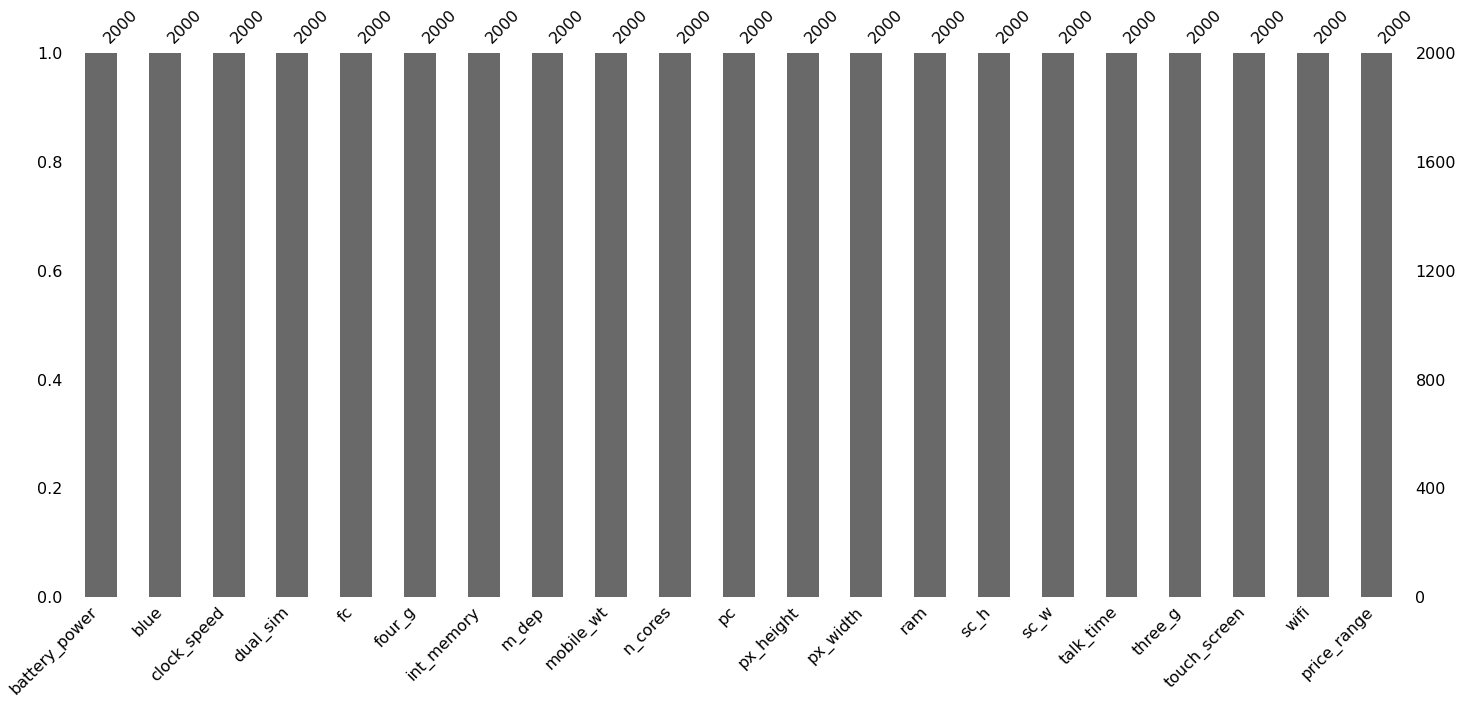

In [66]:
# check the null values by using plotting.
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

In [7]:
data.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

In [6]:
data = data.duplicated()
sum(data)
#Removing Duplicates


0

In [11]:
print(data['price_range'].nunique())

4


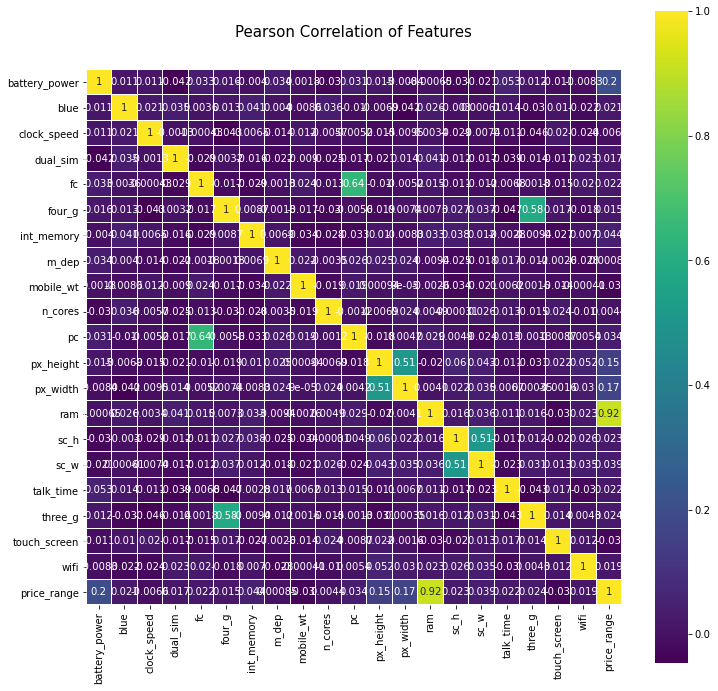

In [13]:
# heatmap to check if there is any correlation present in the data.
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [14]:
for i in data.columns:
    bser= pd.isnull(data[i])

In [15]:
data[bser]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


## Visualizing our Data , finding correlation among features and target label

In [16]:
for i in data.columns:
    print(i,data[i].corr(data['price_range'],method = 'pearson'))

battery_power 0.20072261211373096
blue 0.02057285406141851
clock_speed -0.00660569088173206
dual_sim 0.01744447923722471
fc 0.021998207776904265
four_g 0.014771711417239408
int_memory 0.04443495938898743
m_dep 0.0008530365050864332
mobile_wt -0.030302171314386415
n_cores 0.004399274799457283
pc 0.03359930021353949
px_height 0.1488575550004218
px_width 0.16581750172625512
ram 0.9170457362649908
sc_h 0.022986073167424424
sc_w 0.03871127166448418
talk_time 0.021858871162374775
three_g 0.023611216880045024
touch_screen -0.03041107189821801
wifi 0.01878481201278902
price_range 1.0


In [8]:
data.loc[data['price_range']==3.0].head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3


In [9]:
data.corr(method = 'pearson').head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998


In [10]:
# To check the column type and count of the variables.
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,19
1,float64,2


In [11]:
dtype_df.loc[:21,:]

,Count,Column Type
0,battery_power,int64
1,blue,int64
2,clock_speed,float64
3,dual_sim,int64
4,fc,int64
5,four_g,int64
6,int_memory,int64
7,m_dep,float64
8,mobile_wt,int64
9,n_cores,int64


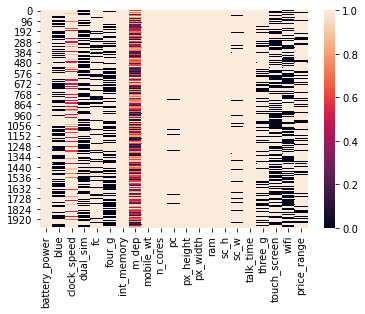

In [14]:
import seaborn as sns
ax = sns.heatmap(data, vmin=0, vmax=1)


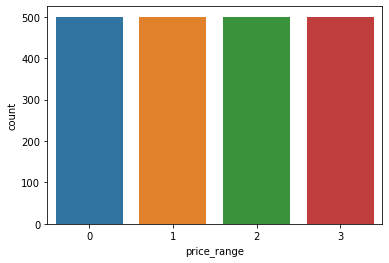

In [15]:
import seaborn as sns
sns.countplot(data['price_range'],label="Count")

## VIF to check the presence of multicollinearity between the variables

In [16]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
features = "+".join(data.columns.difference(["price_range"]))

In [18]:
features

'battery_power+blue+clock_speed+dual_sim+fc+four_g+int_memory+m_dep+mobile_wt+n_cores+pc+px_height+px_width+ram+sc_h+sc_w+talk_time+three_g+touch_screen+wifi'

In [19]:
#perform vif

a, b = dmatrices(formula_like= 'price_range ~ ' + features,data=data,return_type="dataframe")
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns

In [20]:
vif

,VIF Factor,Features
0,73.921098,Intercept
1,1.009945,battery_power
2,1.011342,blue
3,1.006025,clock_speed
4,1.011555,dual_sim
5,1.718987,fc
6,1.528509,four_g
7,1.009274,int_memory
8,1.006385,m_dep
9,1.004548,mobile_wt


In [21]:
X = data.drop('price_range', axis = 1)
y = data.price_range

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as statmodel


## Feature selection  by using filter methods like selectKBest, Pearson Correlation

In [23]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [38]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe

print(featureScores.nlargest(20,'Score')) #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643


[0.06018608 0.01888009 0.03244061 0.01947739 0.0283579  0.01565252
 0.03279675 0.0341282  0.03656665 0.03014201 0.03381907 0.04902721
 0.05052639 0.41003624 0.03001308 0.0341058  0.03148509 0.01422739
 0.01838618 0.01974534]


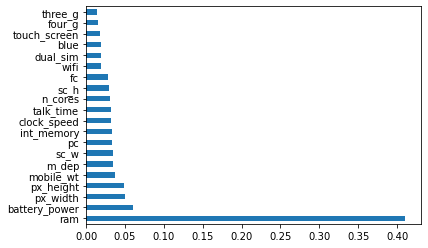

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,
index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

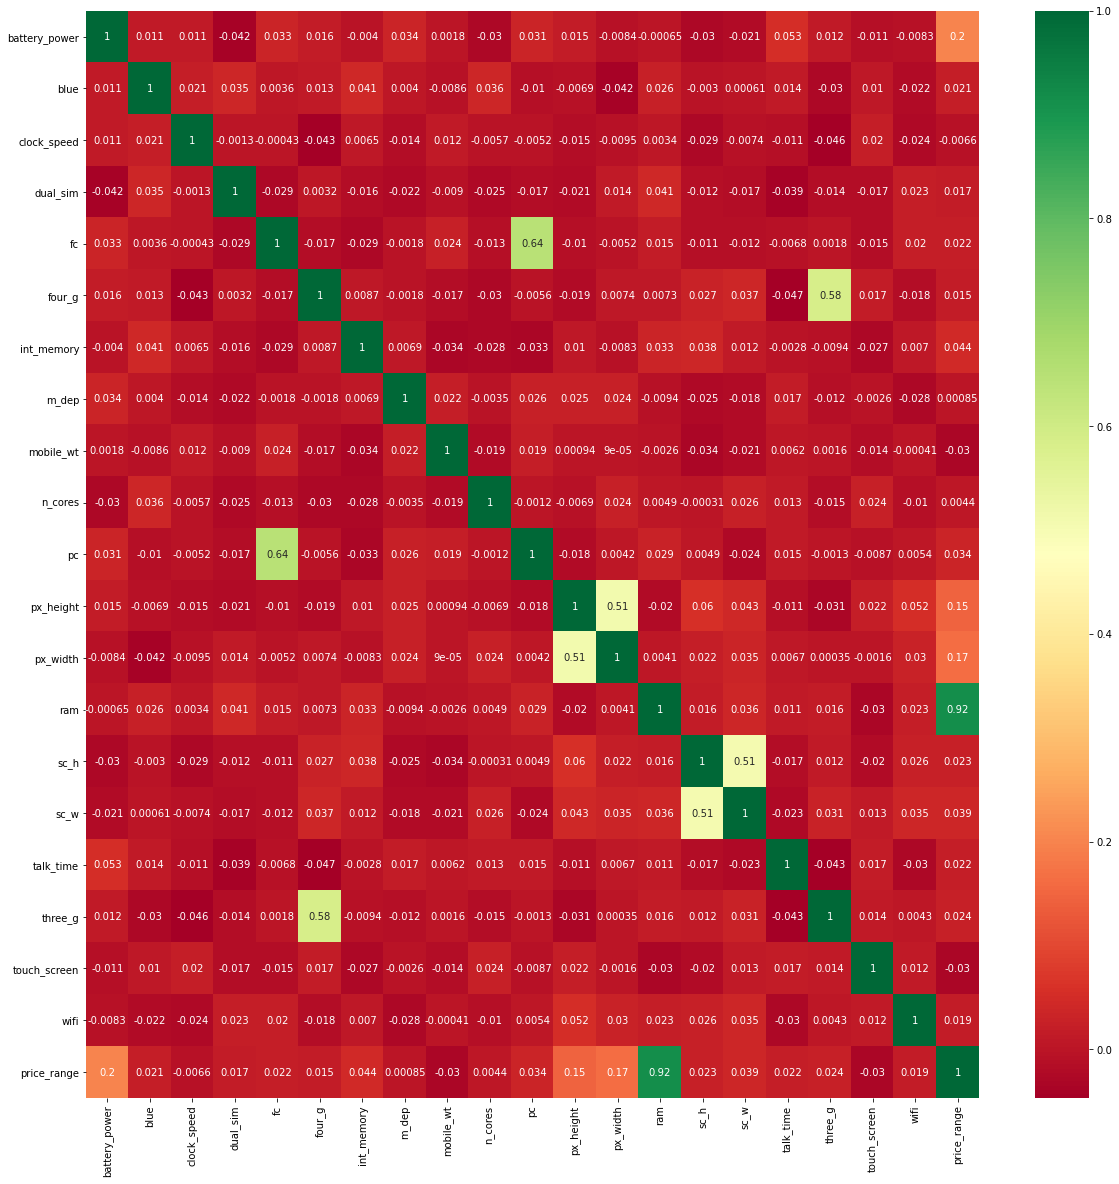

In [26]:
#get correlations of each features in dataset
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn"
)

In [40]:
X.describe().T.shape

(20, 8)

In [41]:
data.shape

(2000, 21)

Text(0, 0.5, 'Data type')

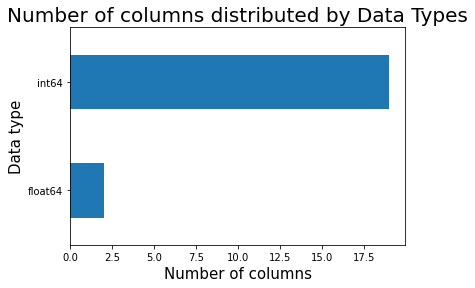

In [43]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [30]:
print(data.select_dtypes('object').apply(pd.Series.nunique, axis = 0))


Series([], dtype: float64)


In [31]:
numeric_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]


In [32]:
numeric_var_names

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [34]:
feature_name = list(X_train.columns)
num_feats=15

In [35]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 20 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=10, verbose=5)

In [36]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

15 selected features


In [37]:
rfe_feature

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [8]:
X = data.loc[:,['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h','pc','n_cores']]
y = data['price_range']

In [9]:
X.shape,y.shape

((2000, 12), (2000,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)


In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1',C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

C:\Users\per\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\per\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.876
Test set score: 0.874


In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,
y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,
y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.764


In [13]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.8968286  0.04234231 0.06082909 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Feature Importances (%)')

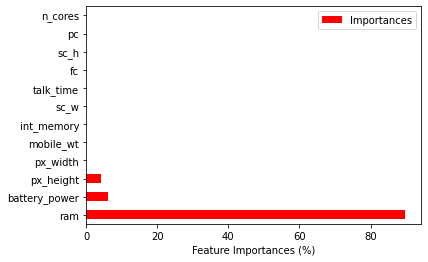

In [15]:
# feature importance

pd.DataFrame(data = tree.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3,n_estimators=100,criterion='gini', random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train,
y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test,
y_test)))

Accuracy on training set: 0.849
Accuracy on test set: 0.820


In [17]:
print("Feature importances:\n{}".format(rf.feature_importances_))

Feature importances:
[0.70594565 0.0503743  0.08057399 0.07124126 0.01491567 0.01959072
 0.01122353 0.01290902 0.00656698 0.00799694 0.0047297  0.01393223]


Text(0.5, 0, 'Feature Importances (%)')

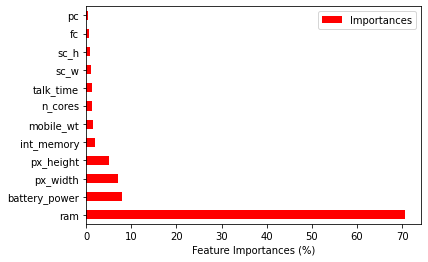

In [18]:
pd.DataFrame(data = rf.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate=0.01)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.800


Text(0.5, 0, 'Feature Importances (%)')

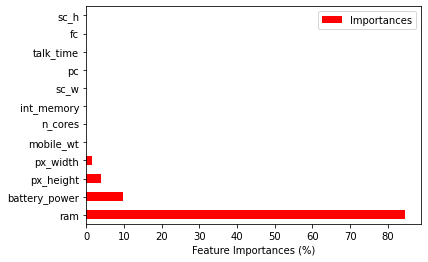

In [20]:
pd.DataFrame(data = gb.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
from sklearn.svm import SVC
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.95


C:\Users\per\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.96
